In [1]:
# RFM (Recency Frequency Monetary) Analysis


**RFM** is a method used for analysing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries

RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?

Before starting RFM analysis we need to set objective and outcome of analysis, for this example goal is to define class of customer example - Platinum, Gold and Silver.

* Platinum customer - frequent and more revenue generator.
* Gold customer - frequent but less revenue generator.
* Silver customer - less frequent and less revenue generator.

In [2]:
# Importing all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
# load the data
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.Country.value_counts().head(5)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [7]:
df1 = df[df.Country == 'United Kingdom']

<AxesSubplot:>

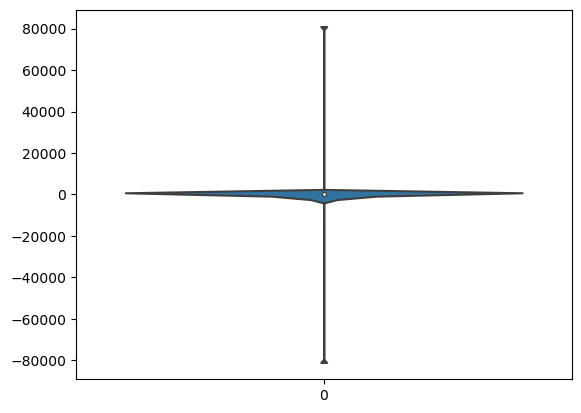

In [8]:
sns.violinplot(df1.Quantity)

In [9]:
df1.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [10]:
# Quantity can not be negative so remove negative values...
df1 = df[df['Quantity']>=0]
df1.Quantity.describe()

count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

<AxesSubplot:>

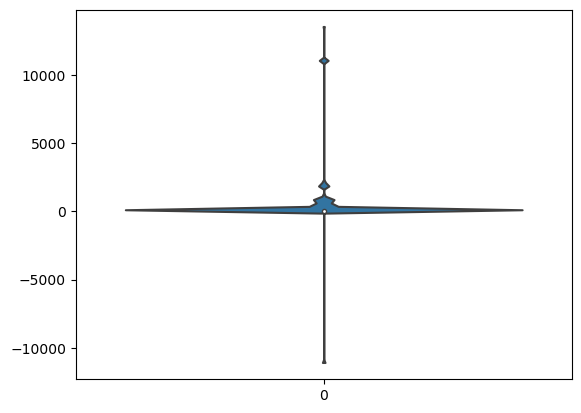

In [11]:
# checking distribution of unit price
sns.violinplot(df1.UnitPrice)


In [12]:
df1 = df1[df1['UnitPrice']>=0]
df1.UnitPrice.describe()

count    531283.000000
mean          3.898954
std          35.876279
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

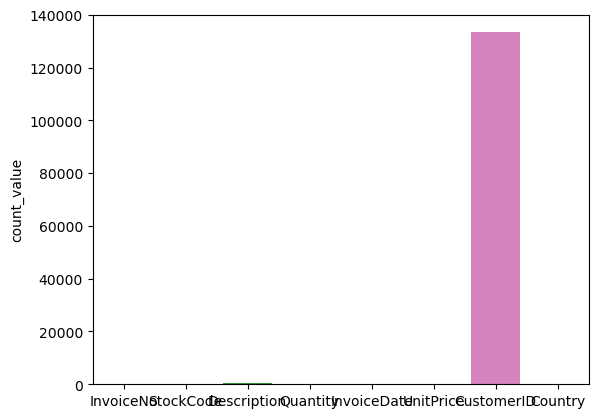

In [13]:
#Checking null values in all columns in dataset

null_values = pd.DataFrame(df1.isnull().sum(),columns=['count_value'])
ax = sns.barplot(y = null_values.count_value,x = null_values.index)


In [14]:
df1.dropna(subset=['CustomerID'],inplace=True)

In [15]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
# Last date available
df1['InvoiceDate'].max()

'9/9/2011 9:52'

In [17]:
# use latest date in out data as current date....

import datetime as dt
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [18]:
df1['date'] = pd.DatetimeIndex(df1.InvoiceDate).date

In [19]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [20]:
# Group by customer by last date they purchased

recent_df = df1.groupby(['CustomerID'],as_index=False) ['date'].max()
recent_df.columns = ['CustomerID', 'LastPurchaseDate']
recent_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [21]:
#calculate how often he is purchasing with reference to latest date in days


recent_df['recency'] = recent_df.LastPurchaseDate.apply(lambda x: (now - x).days)

In [22]:
recent_df.head()

,CustomerID,LastPurchaseDate,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [23]:
recent_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [24]:
# Check frequency of customer means how many transaction has been done...

frequency_df = df1.copy()
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'],keep='first',inplace=True)
frequency_df = frequency_df.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [25]:
#Calculate how much a customer spend in the each transaction ...

df1['Total_cost'] = df1['UnitPrice'] * df1['Quantity']

In [26]:
#Check summed up spend of a customer with respect to latest date....

monetary_df = df1.groupby('CustomerID',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']


In [27]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [28]:
#cmbine all together all dataframe in so we have recency, frequency, and monetary values together

# combine first recency and frequency

rf = recent_df.merge(frequency_df,left_on = 'CustomerID',right_on = 'CustomerID')

#Combine rf frame with monetary values...
rfm = rf.merge(monetary_df,left_on = 'CustomerID',right_on='CustomerID')

rfm.set_index('CustomerID',inplace=True)


In [29]:
rfm.head()

,recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [30]:
#Checking correctness of output.

df1[df1['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,77183.6


In [31]:
(now - dt.date(2011,1,18)).days == 325

True

In [32]:
# Bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

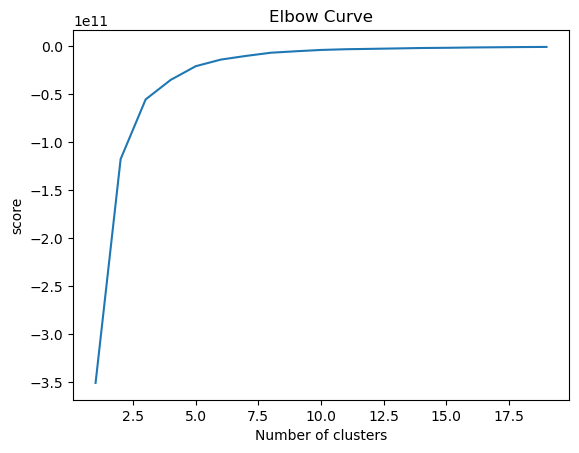

In [33]:
from sklearn.cluster import KMeans
#Get the right number of cluster for kmeans so 
#we need to loop from 1 to 20 number of cluster and check score
# Elbow method is used to represent that.
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.title('Elbow Curve')
plt.show()

In [34]:
# Fitting data in kmeans theorem

kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [35]:
#This creates a new column called cluster which has cluster number for each row respectively
rfm_segmentation['cluster'] = kmeans.labels_

In [36]:
# check our hypothesis
rfm_segmentation[rfm_segmentation.cluster == 0].head(10)


,recency,Frequency,Monetary,cluster
CustomerID,,,,
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,310,1,334.40,0
12352.0,36,8,2506.04,0
12353.0,204,1,89.00,0
12354.0,232,1,1079.40,0
12355.0,214,1,459.40,0
12356.0,22,3,2811.43,0


<AxesSubplot:xlabel='cluster', ylabel='recency'>

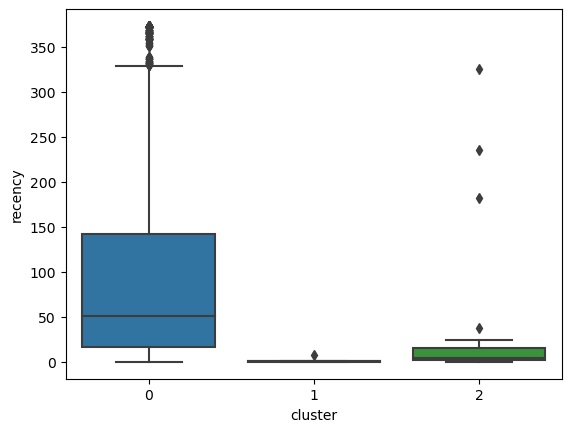

In [37]:
''' Cluster 0 have high recency rate which is bad. cluster1 and cluster 2 
having low so they are in race of platinum and gold customer'''

sns.boxplot(x = rfm_segmentation.cluster,y = rfm_segmentation.recency)


<AxesSubplot:xlabel='cluster', ylabel='Frequency'>

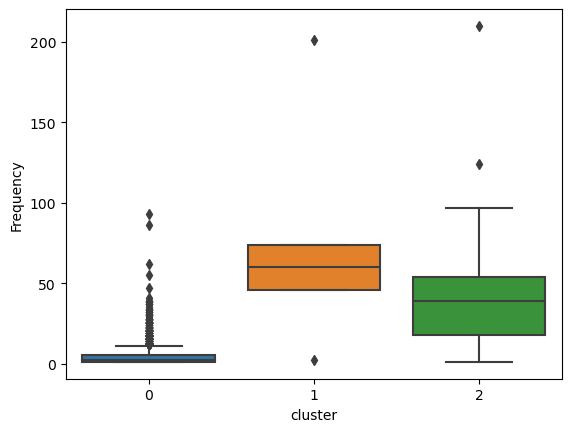

In [38]:
''' cluster 0 have low frequency rate which is bad .
cluster 1 and 2 having high so they are in race of
platinum and gold customer'''

sns.boxplot(x = rfm_segmentation.cluster,y = rfm_segmentation.Frequency)

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

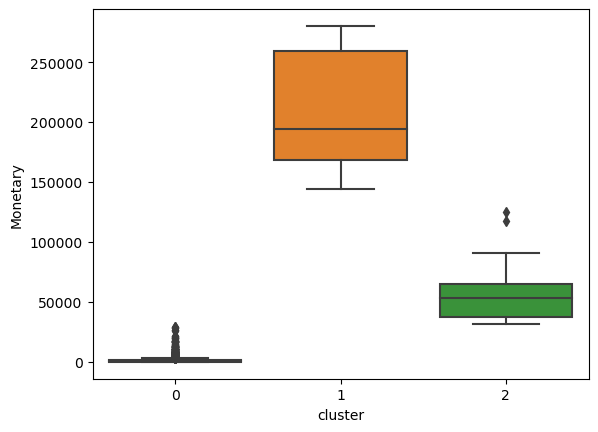

In [39]:
''' Cluster 0 have low Monetary rat which is bad. cluster 1 have highest
monetary (money spend) platinum where as cluster 2 have
medium level(gold) and cluster 0 is silver customer'''

sns.boxplot(x = rfm_segmentation.cluster,y = rfm_segmentation.Monetary)


Based on customer segmentation we found that cluster 1 is platinum customers cluster 2 is gold customers cluster 3 is silver customers.

# Optional steps if you want to perform for more granularity.

In [40]:
# Arguments (x = value, p = recency, monetary_value, frequency,d = quartiles dict)

# lower the recency , good for store..

def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
# Arguments (x = value, p= recency, monetary value, frequency, k= quartiles dict)

# higher value of frequency and monetary lead to a good consumer.
# here higher value = 1 in reverse way.

def FMscore(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [41]:
''' Quartile is like 25% , 50% and 75% level of values. example 
if we have 100 values first 25 in 1st quartile 25% then 
second contain next 25% which is 50% and there after next 25%
which is 75% and 4th quartile is more than 75% values'''

quantile = rfm.quantile(q = [0.25,0.5,0.75])
quantile

,recency,Frequency,Monetary
0.25,17.0,1.0,307.245
0.50,50.0,2.0,674.450
0.75,141.5,5.0,1661.640


In [42]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(Rscore,args=('recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore,args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantile))

In [43]:
quantile.to_dict()

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.245, 0.5: 674.45, 0.75: 1661.64}}

In [44]:
# calculate RFM score..

rfm_segmentation['RFMscore'] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)

In [45]:
rfm_segmentation.head()

,recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMscore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441
12347.0,2,7,4310.00,0,1,1,1,111
12348.0,75,4,1797.24,0,3,2,1,321
12349.0,18,1,1757.55,0,2,4,1,241
12350.0,310,1,334.40,0,4,4,3,443


In [46]:
''' Another possibility is to combine the scores to create one score 
(eg. 4+1+1). This will create a score between 3 and 12.
Here the advantage is that each of the scoress got same importance.
HOwever some scores will have many segments as constituents(eg -413 ad 431)'''
rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + rfm_segmentation['M_Quartile']

In [47]:
rfm_segmentation.head()

,recency,Frequency,Monetary,cluster,R_Quartile,F_Quartile,M_Quartile,RFMscore,Total_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,2,4,4,1,441,9
12347.0,2,7,4310.00,0,1,1,1,111,3
12348.0,75,4,1797.24,0,3,2,1,321,6
12349.0,18,1,1757.55,0,2,4,1,241,7
12350.0,310,1,334.40,0,4,4,3,443,11


In [48]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMscore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMscore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMscore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMscore']=='444']))

Best Customers:  456
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  34
Lost Customers:  208
Lost Cheap Customers:  443
